In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [90]:
df = pd.read_csv('../data/clean_dataset.csv')

In [ ]:
data = np.array(df)
data = data.reshape((data.shape[0], 1))
data.shape

In [91]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df)

In [31]:
import pickle

with open('../scaler/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

TypeError: MinMaxScaler.transform() takes 2 positional arguments but 10 were given

In [92]:
df_scaled[100]

array([0.2012208 , 0.26283368, 0.06709402, 0.14761017, 0.24824844,
       0.32713539, 0.31654344, 0.06896552, 0.11444142])

In [32]:
train_split = round(len(df)*0.80) 
test_split = round(len(df)*0.10)

df_training = df_scaled[:train_split]
df_val = df_scaled[train_split:-test_split]
df_testing = df_scaled[-test_split:]

In [110]:
df.shape

(1233, 9)

In [79]:
def createXY(data, n_past, n_feature):
  dataX = []
  dataY = []
  for i in range(n_past, len(data)-31):
    dataX.append(data[i - n_past:i, n_feature])
    dataY.append(data[i+31, n_feature])
  dataX = np.array(dataX)
  dataY = np.array(dataY)
  dataX = dataX.reshape(dataX.shape[0], dataX.shape[1], 1)
  return dataX, dataY

trainX, trainY = createXY(df_training, 20, 0)
testX, testY = createXY(df_testing, 20, 0)
valX, valY = createXY(df_val, 20, 0)

input_shape = trainX[0].shape
input_shape

(20, 1)

In [80]:
trainX, trainY = createXY(df_training, 20, 0)
testX, testY = createXY(df_testing, 20, 0)
valX, valY = createXY(df_val, 20, 0)

input_shape = trainX[0].shape
input_shape

(20, 1)

In [113]:
# model bawang putih

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=input_shape),
  tf.keras.layers.LSTM(units=256, return_sequences=True),
  tf.keras.layers.LSTM(units=256, return_sequences=True),
  tf.keras.layers.LSTM(units=256),
  tf.keras.layers.Dense(units=1, activation='relu'),
])
model.compile(optimizer='adam', 
              loss='mean_squared_error')

history = model.fit(trainX, trainY, 
                    epochs=20, 
                    batch_size=32, 
                    validation_data=(valX, valY), 
                    verbose=1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 0.0411 - val_loss: 0.0037
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0232 - val_loss: 0.0043
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 0.0229 - val_loss: 0.0052
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: 0.0249 - val_loss: 0.0091
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 0.0230 - val_loss: 0.0079
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 0.0147 - val_loss: 0.0160
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0218 - val_loss: 0.0043
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.0197 - val_loss: 0.0063
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.0163 - val_loss: 0.0134
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 0.0142 - val_loss: 0.0084
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.0167 - val_loss: 0.0112
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/ste

In [114]:
model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_51 (LSTM)                  │ (None, 20, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_52 (LSTM)                  │ (None, 20, 256)        │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,945,221 (15.05 MB)

 Trainable params: 1,315,073 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,630,148 (10.03 MB)

In [117]:
predictionsOnTrain = model.predict(trainX)
predictionsOnVal = model.predict(valX)
predictionsOnTest = model.predict(testX)

mse1 = np.mean((predictionsOnTrain - trainY) ** 2)
mse2 = np.mean((predictionsOnVal - valY) **2)
mse3 = np.mean((predictionsOnTest - testY) **2)

print(f'\nLoss pada data training: {mse1}')
print(f'Loss pada data validation: {mse2}')
print(f'Loss pada data testing: {mse3}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Loss pada data training: 0.04646139284326212
Loss pada data validation: 0.00917920516303859
Loss pada data testing: 0.07144135408273318


In [ ]:
trainY

In [137]:
predictions = model.predict(testX)

mse = np.mean((testY - predictions) **2)
mae = np.mean(abs(testY - predictions))
rmse = np.sqrt(np.mean((predictions - testY) ** 2))
mape = 100 * np.mean(abs((predictions - testY) / testY))

print(f'MSE pada data testing: {mse}')
print(f'MAE pada data testing: {mae}')
print(f'RMSE pada data testing: {rmse}')
print(f'MAPE pada data testing: {mape}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
MSE pada data testing: 0.04646139284326212
MAE pada data testing: 0.15610929472276394
RMSE pada data testing: 0.2155490497387129
MAPE pada data testing: inf


C:\Users\wisnu\AppData\Local\Temp\ipykernel_3500\3169837971.py:6: RuntimeWarning: divide by zero encountered in divide
  mape = 100 * np.mean(abs((predictions - trainY) / trainY))


In [133]:
predictions[1]-trainY[1]

array([0.05958754], dtype=float32)

In [116]:
model.predict(trainX[200:202])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[0.15737301],
       [0.17200547]], dtype=float32)

In [47]:
model.weights

[<KerasVariable shape=(1, 1024), dtype=float32, path=sequential_3/lstm_9/lstm_cell/kernel>,
 <KerasVariable shape=(256, 1024), dtype=float32, path=sequential_3/lstm_9/lstm_cell/recurrent_kernel>,
 <KerasVariable shape=(1024,), dtype=float32, path=sequential_3/lstm_9/lstm_cell/bias>,
 <KerasVariable shape=(256, 1024), dtype=float32, path=sequential_3/lstm_10/lstm_cell/kernel>,
 <KerasVariable shape=(256, 1024), dtype=float32, path=sequential_3/lstm_10/lstm_cell/recurrent_kernel>,
 <KerasVariable shape=(1024,), dtype=float32, path=sequential_3/lstm_10/lstm_cell/bias>,
 <KerasVariable shape=(256, 1024), dtype=float32, path=sequential_3/lstm_11/lstm_cell/kernel>,
 <KerasVariable shape=(256, 1024), dtype=float32, path=sequential_3/lstm_11/lstm_cell/recurrent_kernel>,
 <KerasVariable shape=(1024,), dtype=float32, path=sequential_3/lstm_11/lstm_cell/bias>,
 <KerasVariable shape=(256, 1), dtype=float32, path=sequential_3/dense_3/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequenti

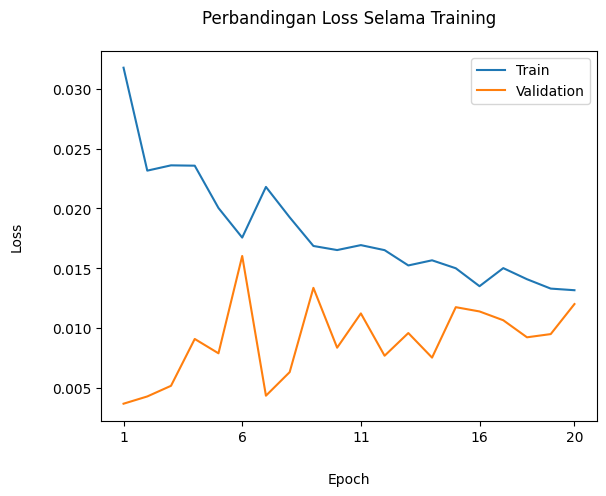

In [118]:
epochs_range = range(1, len(history.history['loss']) + 1)
plt.plot(epochs_range, history.history['loss'])
plt.plot(epochs_range, history.history['val_loss'])
plt.title('Perbandingan Loss Selama Training', pad=20)
plt.xlabel('Epoch', labelpad=20)
plt.xticks([1,6,11,16,20])
plt.ylabel('Loss', labelpad=20)
plt.legend(['Train', 'Validation'])
plt.show()

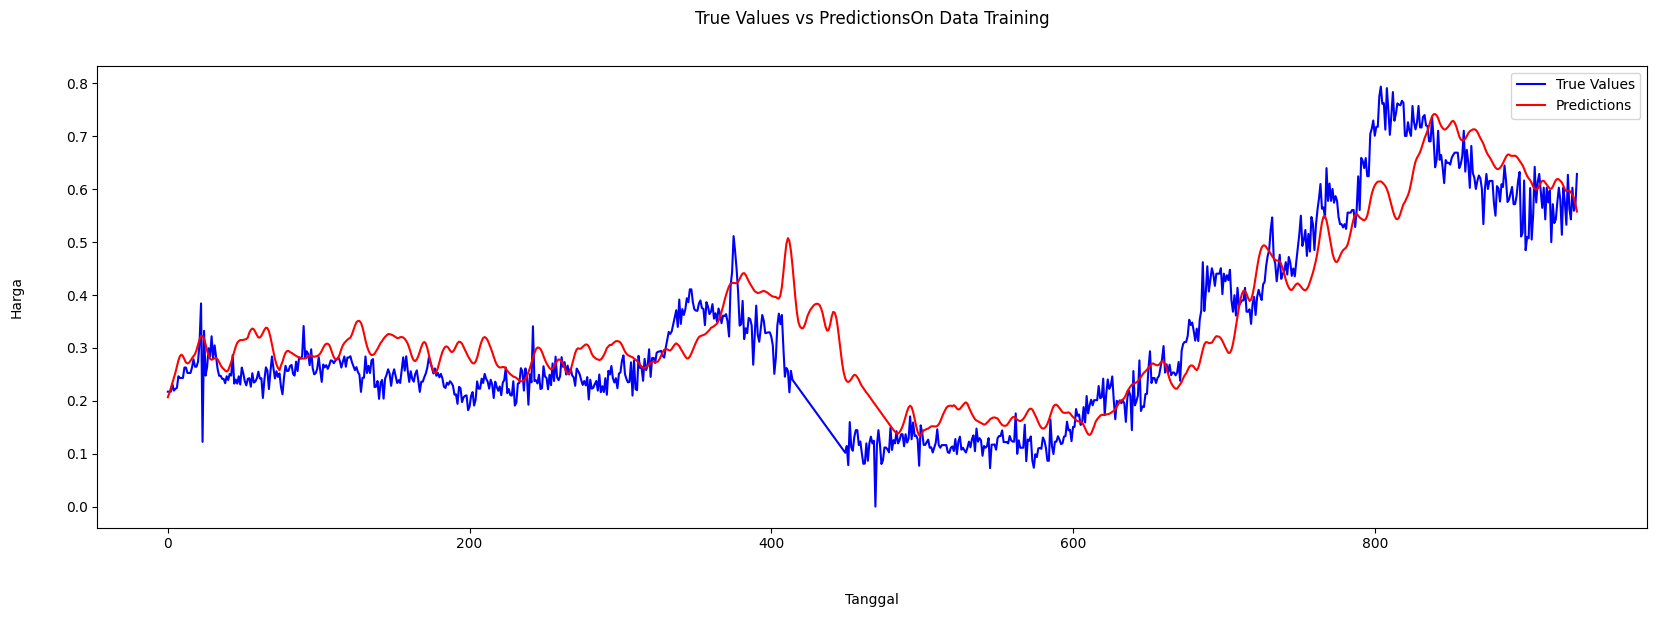

In [36]:
# Plot nilai prediksi dan nilai sebenarnya

plt.figure(figsize=(20, 6))
plt.plot(trainY, label='True Values', color='blue')
plt.plot(predictionsOnTrain, label='Predictions', color='red')

plt.xlabel('Tanggal', labelpad=30)
plt.ylabel('Harga', labelpad=30)
plt.title('True Values vs PredictionsOn Data Training', pad=30)
plt.legend()

plt.show()

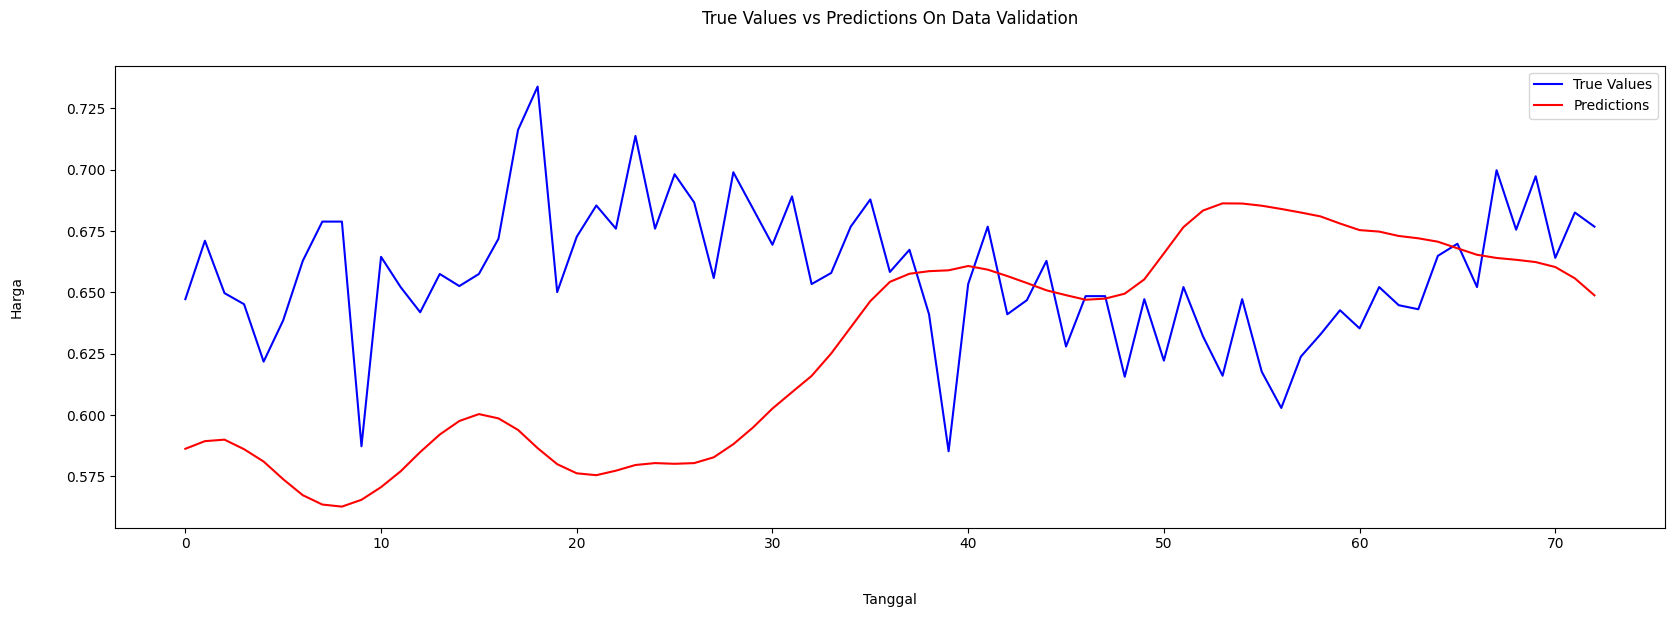

In [37]:
# Plot nilai prediksi dan nilai sebenarnya

plt.figure(figsize=(20, 6))
plt.plot(valY, label='True Values', color='blue')
plt.plot(predictionsOnVal, label='Predictions', color='red')

plt.xlabel('Tanggal', labelpad=30)
plt.ylabel('Harga', labelpad=30)
plt.title('True Values vs Predictions On Data Validation', pad=30)
plt.legend()

plt.show()

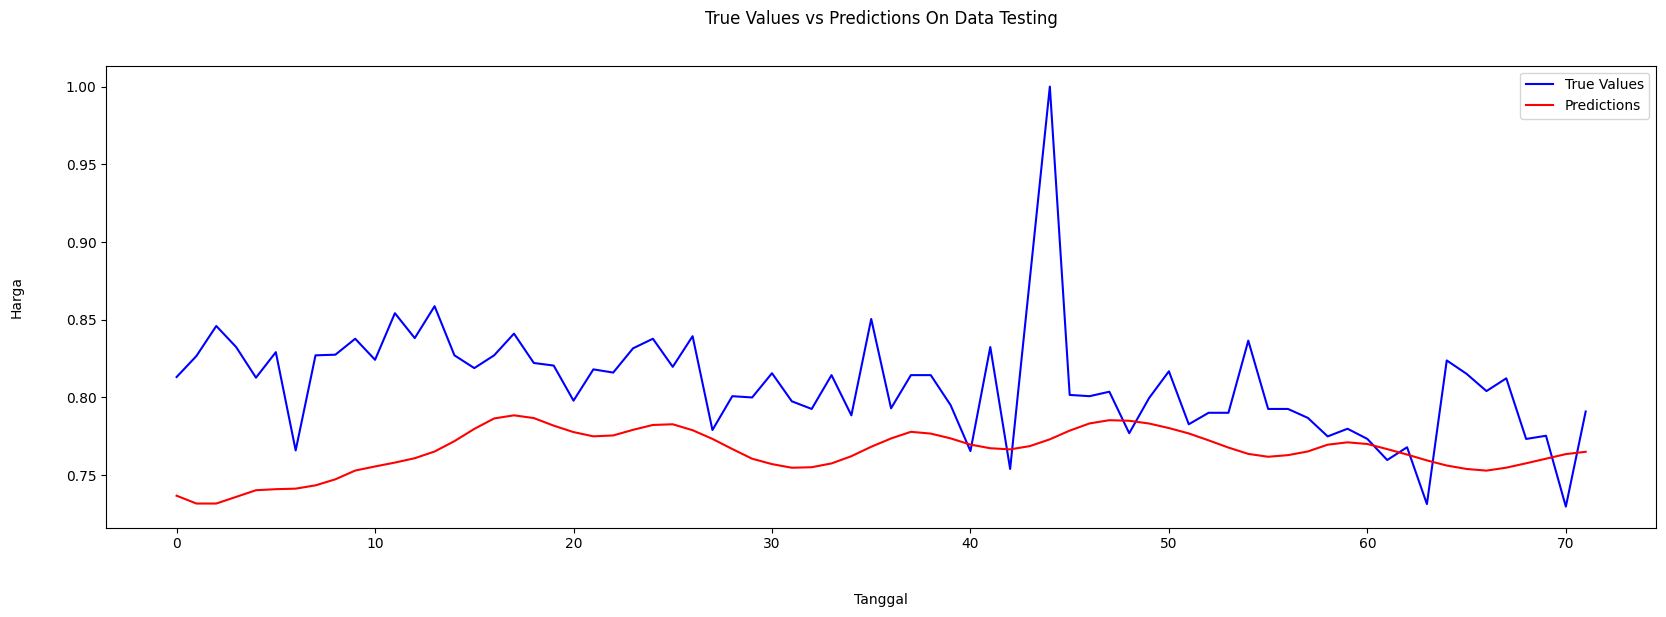

In [38]:
# Plot nilai prediksi dan nilai sebenarnya

plt.figure(figsize=(20, 6))
plt.plot(testY, label='True Values', color='blue')
plt.plot(predictionsOnTest, label='Predictions', color='red')

plt.xlabel('Tanggal', labelpad=30)
plt.ylabel('Harga', labelpad=30)
plt.title('True Values vs Predictions On Data Testing', pad=30)
plt.legend()

plt.show()

In [30]:
if __name__ == '__main__':
    model.save("../models/model_2.h5")

In [116]:
def createXY(data, n_past):
  dataX = []
  dataY = []
  for i in range(n_past, len(data)):
    dataX.append(data[i - n_past:i, 1])
    dataY.append(data[i, 1])
  dataX = np.array(dataX)
  dataY = np.array(dataY)
  return dataX, dataY

In [117]:
trainX_ann, trainY_ann = createXY(df_training, 30)
testX_ann, testY_ann = createXY(df_testing, 30)
valX_ann, valY_ann = createXY(df_val, 30)

input_shape_ann = trainX_ann[0].shape
input_shape_ann

(30,)

In [118]:
# Build the ANN model
model_ann = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=input_shape_ann),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='relu'),
])

model_ann.compile(optimizer='adam', loss='mean_squared_error')

model_ann.fit(trainX_ann, trainY_ann, epochs=10, batch_size=32, validation_data=(valX_ann, valY_ann))

predictions_ann = model_ann.predict(testX_ann)

mse_ann = np.mean((predictions_ann - testY_ann) ** 2)
print("Loss (ANN):", mse_ann)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0118 - val_loss: 0.0011
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 7.0231e-04
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7677e-04 - val_loss: 6.7434e-04
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4228e-04 - val_loss: 0.0021
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 6.4231e-04
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9522e-04 - val_loss: 0.0034
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4222e-04 - val_loss: 6.6377e-04
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3585e-04 - val_loss: 0.0014
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.2964e-04 - val_loss: 0.0020
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Loss (ANN): 0.003625564528743862


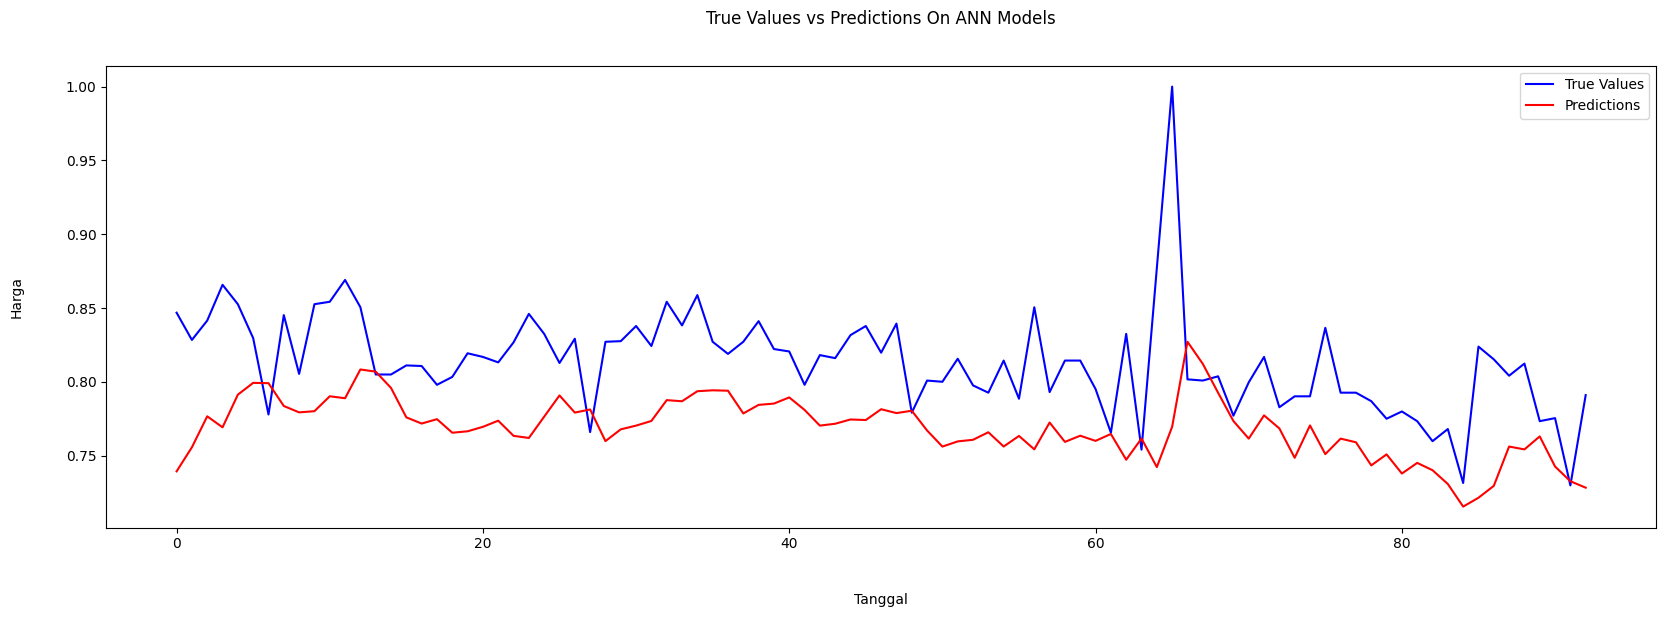

In [119]:
# Plot nilai prediksi dan nilai sebenarnya

plt.figure(figsize=(20, 6))
plt.plot(testY, label='True Values', color='blue')
plt.plot(predictions_ann, label='Predictions', color='red')

plt.xlabel('Tanggal', labelpad=30)
plt.ylabel('Harga', labelpad=30)
plt.title('True Values vs Predictions On ANN Models', pad=30)
plt.legend()

plt.show()